In [10]:
# mengimport library yang dibutuhkan

import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

In [11]:
# membaca dataset

Tweet= pandas.read_csv("C:/Users/Owner/Downloads/TweetsFF.csv")
Tweet.head()

,user,comment,sentiment,labeler
0,SHSHOX !,The villain is going to be hard to defeat espe...,neutral,idel
1,Marko T.,Fast Furious 20- Toreto find out that he is hi...,neutral,idel
2,syed nazzim,In the post-credit scene Nick fury hires Vin d...,neutral,idel
3,Chris,Fast and furious 10: The last ride Fast and fu...,neutral,idel
4,mr burnik,"Next chapter : Hitler joins the crew its now ""...",neutral,idel


In [138]:
Tweet['sentiment'].value_counts()

neutral     391
positive    181
negative    168
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'Jumlah Data Per Sentimen')

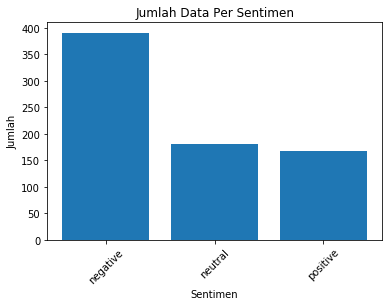

In [110]:
# membuat diagram batang seberapa banyak data per sentimen

sentiment_count=Tweet['sentiment'].value_counts()

plt.bar(Index,sentiment_count)
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Jumlah')
plt.xlabel('Sentimen')
plt.title('Jumlah Data Per Sentimen')

In [18]:
# mengimport library wordcloud untuk membuat word cloud

import wordcloud

In [19]:
from wordcloud import WordCloud,STOPWORDS

In [114]:
# membuat word cloud untuk komentar bersentimen negative

df=Tweet[Tweet['sentiment'] == 'negative']
words = ' '.join(df['comment'])

In [115]:
cleaned_word = " ".join([word for word in words.split()])

In [116]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

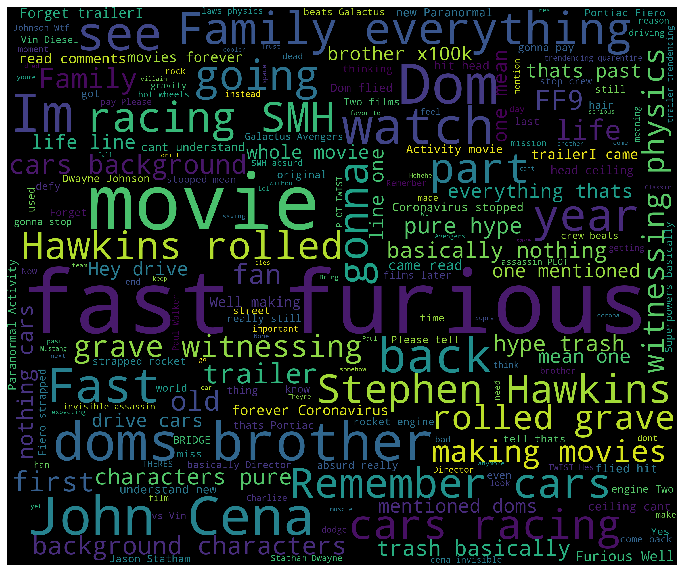

In [117]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [123]:
# membuat word cloud untuk komentar bersentimen positive

df=Tweet[Tweet['sentiment'] == 'positive']
words = ' '.join(df['comment'])

In [124]:
cleaned_word = " ".join([word for word in words.split()])

In [125]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

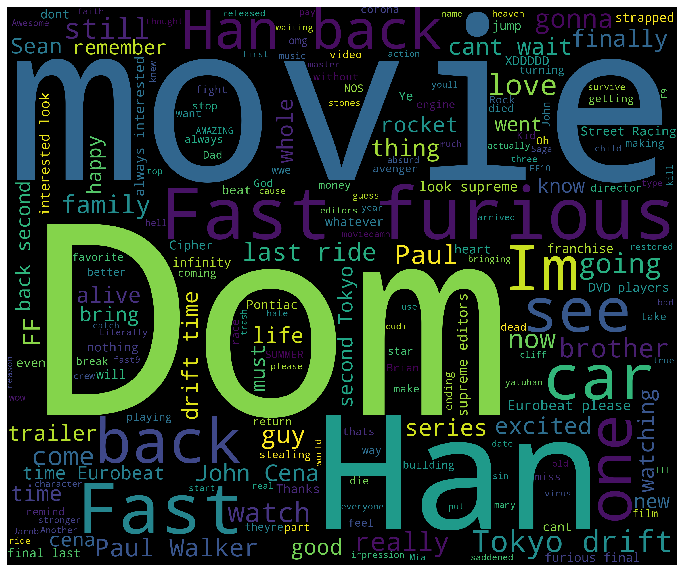

In [126]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [130]:
# membuat word cloud untuk seluruh komentar

words = ' '.join(Tweet['comment'])

In [131]:
cleaned_word = " ".join([word for word in words.split()])

In [132]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

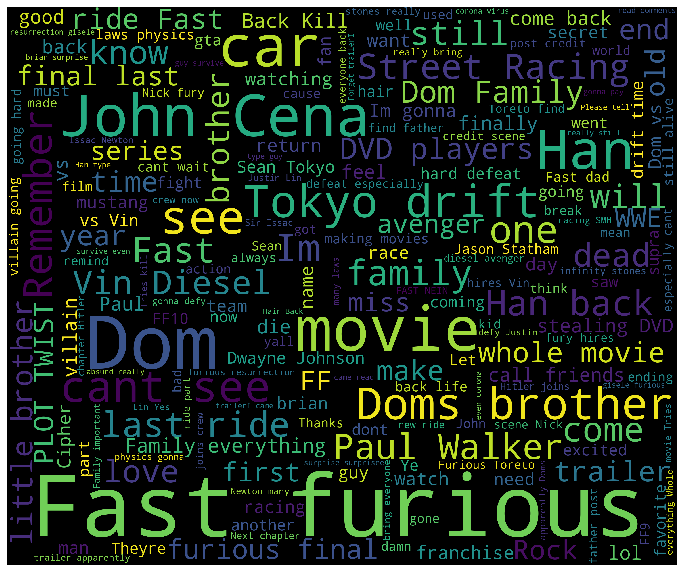

In [133]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [134]:
# membuat word cloud untuk tweet bersentimen neutral

df=Tweet[Tweet['sentiment'] == 'neutral']
words = ' '.join(df['comment'])

In [135]:
cleaned_word = " ".join([word for word in words.split()])

In [136]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)

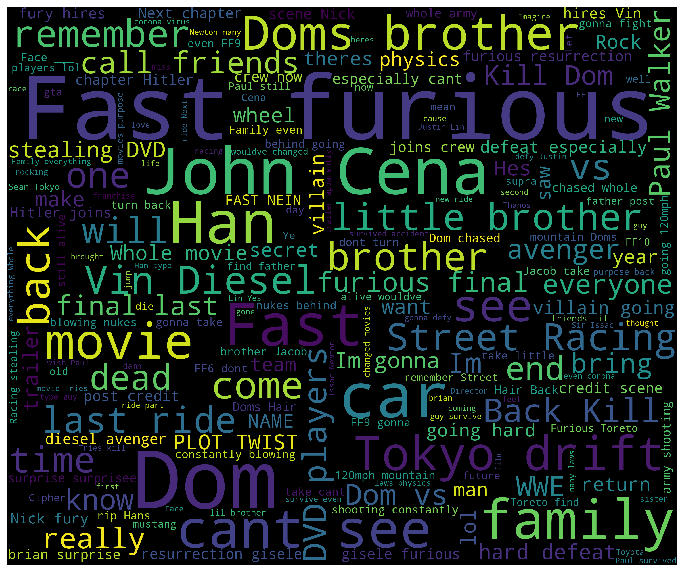

In [137]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [50]:
import pandas as pd
data=pd.read_csv("C:/Users/Owner/Documents/tubesEDM/TweetsFF.csv")

In [51]:
# melihat seberapa banyak datanya
data.shape

(740, 4)

In [55]:
# deskripsi dataset
data.describe()

,user,comment,sentiment,labeler
count,737,740,740,740
unique,371,383,3,5
top,Benton Xavier,Fast And Furious 10: Doms Hair Is Back To Kill...,neutral,skolastika
freq,10,6,391,150


In [56]:
# menghitung variabel katogorik pada kolom sentimen
data['sentiment'].value_counts()

neutral     391
positive    181
negative    168
Name: sentiment, dtype: int64

In [57]:
# mengubah data kategori positive dan neutral menjadi good, dan negative menjadi bad
data['sentiment'] = data['sentiment'].map({'positive':'good',
                                           'neutral':'good',
                                           'negative':'bad'})

In [58]:
# lihat lagi nilai pada sentiment apakah sudah berubah
data['sentiment'].value_counts()

good    572
bad     168
Name: sentiment, dtype: int64

In [59]:
# mengimport library scikit-learn untuk memisahkan data training dan data testing

from sklearn.model_selection import train_test_split

In [60]:
# mendefinisikan variabel
# variabel x adalah komentar
# variabel y adalah sentimen

x=data.comment
y=data.sentiment

In [61]:
# memisahkan untuk data training dan testing
# x_train, x_test, y_train, y_test , merupakan variabel yang akan digunakan
# untuk membuat model nantinya
# train_test_split merupakan fungsi untuk memisahkan data dari variabel (X,y,,
# dimana pembagiannya adalah 90% (train) :10% (test)
# sehingga nilai test_size nya dalah 0.1

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1, random_state=225)

In [62]:
# melihat pembagian dari masing-masing data di x_train, x_test, y_train, y_test

print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 666
Banyak data x_test  : 74
Banyak data y_train : 666
Banyak data y_test  : 74


In [66]:
# TEXT PREPROCESSING

# melakukan cleaning data teks dengan menghapus kata kata yang tidak penting yang tidak termsuk dalam konteks

import re

from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+' # menghilangkan username jika twitter
pat2 = r'https?://[^ ]+' # menghilangkan situs website
combined_pat = r'|'.join((pat1, pat2)) # join pat1 dan pat 2
www_pat = r'www.[^ ]+' # menghilangkan situs website

# mengeset stopword (kata2 yang bisa dihilangkan)
stopwrod = ['up','with','to','the','of','in','is']
stopword_user = set(stopwrod)

In [67]:
# mendefinisikan method untuk data cleaning dan data tokenization menggunakan library beautiful soup

def proses_teks(teks):
    soup = BeautifulSoup(teks, 'lxml')
    souped = soup.get_text()
    try:
        teks = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        teks = souped
    teks_bersih= re.sub("[^a-zA-Z0-9]", " ",(re.sub(www_pat, '', re.sub(combined_pat, '', teks)).lower()))
    teks_bersih= ' '.join([word for word in teks_bersih.split() if word not in stopword_user])
    return (" ".join([x for x in tok.tokenize(teks_bersih) if len(x) > 1])).strip()

In [121]:
# mengetes method proses_teks tersebut dengan kalimat contoh

teks='up is a good movie, to the beautiful you is a so-so drama, world of married couple is a boring drama, and were all in this together'
proses_teks(teks)

'good movie beautiful you so so drama world married couple boring drama and were all this together'

In [72]:
x=[]
for teks in data.comment:
    x.append(proses_teks(teks))

In [73]:
# melakukan cleaning pada data comment

clean_text=pd.DataFrame({'clean_text':x})

In [74]:
data=pd.concat([data,clean_text],axis=1)

In [75]:
# melihat 5 data pertama yang telah dilakukan cleaning
# (hasil bisa dilihat di kolom clean_text)

data.head(5)

,user,comment,sentiment,labeler,clean_text
0,SHSHOX !,The villain is going to be hard to defeat espe...,good,idel,villain going be hard defeat especially when y...
1,Marko T.,Fast Furious 20- Toreto find out that he is hi...,good,idel,fast furious 20 toreto find out that he his ow...
2,syed nazzim,In the post-credit scene Nick fury hires Vin d...,good,idel,post credit scene nick fury hires vin diesel f...
3,Chris,Fast and furious 10: The last ride Fast and fu...,good,idel,fast and furious 10 last ride fast and furious...
4,mr burnik,"Next chapter : Hitler joins the crew its now ""...",good,idel,next chapter hitler joins crew its now fast nein


In [76]:
# mengimport library yang diperlukan untuk vektorisasi (vectorize)

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer, HashingVectorizer

In [78]:
# VECTORIZE

cvec=CountVectorizer()
tvec=TfidfVectorizer()
hvec=HashingVectorizer()

In [98]:
# MODEL DEFINITION

# mengimport library untuk mendefinisikan model klasifikasi

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC

# mendefinisikan 4 model klasifikasi:
# (yang akan dipakai hanya clf4 yaitu Support Vector Classifier)
# karena disini menggunakan metode klasiikasi Support Vector Machine (SVM)

clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
clf3 = BernoulliNB()
clf4 = SVC(gamma='auto') # Support Vector Classifier

In [99]:
# membuat model pipeline

from sklearn.pipeline import Pipeline

In [100]:
# membuat model pipeline menggunakan algoritma SVM (classifier SVC)

model= Pipeline([('vectorizer',tvec)
                 ,('classifier',clf4)]) # menggunakan classifier SVC
model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('classifier',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,

In [101]:
# membuat model prediksi dari classifier SVC

hasil =  model.predict(x_test)

In [104]:
# mengimport library yang dibutuhkan untuk membuat confusion matrix

from sklearn.metrics import accuracy_score,confusion_matrix

In [105]:
# mendefinisikan confusion matrix

tn, fp, fn, tp = confusion_matrix(hasil,y_test).ravel()
tn, fp, fn, tp

# HASIL:
# TN = True Negative = model memprediksi negatif dan prediksinya benar = 0
# FP = False Positive = model memprediksi positf dan prediksinya salah = 0
# FN = False Negative = model memprediksi negatif dan prediksinya salah = 22
# TP = True Positive = model memprediksi positif dan prediksinya benar = 52

(0, 0, 22, 52)

In [106]:
# membentuk confusion matrix dalam bentuk matriks 2x2

confusion_matrix(hasil,y_test)

array([[ 0,  0],
       [22, 52]], dtype=int64)

In [118]:
# mengecek akurasi

accuracy_score(hasil,y_test)

# HASIL:
# hasil akurasi sebesar 0.703 (dibulatkan)

0.7027027027027027

In [119]:
# menyimpan model

from sklearn.externals import joblib